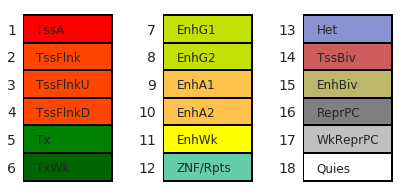

In [1]:
%matplotlib inline

import os as os
import collections as col
import itertools as itt
import pickle as pck
import time as ti
import json as js

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import numpy.random as rng
import scipy.stats as stats
import pandas as pd
from pandas.errors import EmptyDataError
import seaborn as sns
import pulp as plp

# What does this do?
# Plot CMM18 state labels and colors
# for supplementary material

date = '20180803'

run_plot_state_labels = True
save_figures = True
diss_version = True

sns.set(style='white',
        font_scale=1.5,
        rc={'font.family': ['sans-serif'],
            'font.sans-serif': ['DejaVu Sans']})

np.seterr('raise')

journal = 'bmc_genbio'
res = 'print_lo'
fig_sizes = js.load(open('/home/pebert/work/code/mpggit/statediff/annotation/misc/fig_sizes.json'))
fig_sizes = fig_sizes[journal]
resolution = fig_sizes['resolution']

scorings = ['emission', 'replicate']
segmentations = ['cmm18', 'ecs18', 'ecs10']
cmm_state_infos = '/home/pebert/work/code/mpggit/statediff/annotation/chromhmm_18/chromhmm_18_states_info.tsv'

sns.set(style='white',
        font_scale=1.5,
        rc={'font.family': ['sans-serif'],
            'font.sans-serif': ['DejaVu Sans']})

fhgfs_base = '/TL/deep/fhgfs/projects/pebert/thesis/projects/statediff'

cache_dir = os.path.join(fhgfs_base, 'caching/notebooks')

base_out = '/TL/deep-external01/nobackup/pebert/cloudshare/mpiinf/phd/chapter_projects/statediff'
fig_supp = os.path.join(base_out, 'figures', 'pub', 'supp')
fig_main = os.path.join(base_out, 'figures', 'pub', 'main')
fig_collect = os.path.join(base_out, 'figures', 'pub', 'collection')
fig_diss = '/home/pebert/work/code/mpggit/dissertation/Figures/diffchrom'


def to_rgb(color):
    r, g, b = color.split(',')
    r = int(r) / 255
    g = int(g) / 255
    b = int(b) / 255
    return r,g,b


def plot_state_labels(fkey, tex_output, save_diss):
    """
    """
    
    fig, axes = plt.subplots(figsize=fig_sizes['two_col']['half'],
                             nrows=1, ncols=3, sharex=False, sharey=False,
                             gridspec_kw={'width_ratios': [1, 1, 1]})
    
    plt.subplots_adjust(wspace=0.5)
    
    infos = pd.read_csv(cmm_state_infos, sep='\t',
                        header=0, index_col=0)
    infos.to_latex(tex_output, column_format='rll',
                   encoding='ascii', columns=['mnemonic', 'description'],
                   header=True, index=True, index_names=False)
    
    ax_boxes = col.defaultdict(list)
    ax_labels = col.defaultdict(list)
    ax_texts = col.defaultdict(list)
    ax_colors = col.defaultdict(list)
    for row in infos.itertuples():
        ax_idx = (row.Index - 1) // 6
        rgb = to_rgb(row.rgb)
        ax_labels[ax_idx].append(row.Index)
        ax_texts[ax_idx].append(row.mnemonic)
        ax_colors[ax_idx].append(rgb)
        ax_boxes[ax_idx].append(1)
        
    for ax_idx in sorted(ax_boxes.keys()):
        ax = axes[ax_idx]
        y_pos = np.arange(0, 6)[::-1]
        boxes = np.array(ax_boxes[ax_idx], dtype=np.int8)
        bars = ax.barh(y_pos, 5, boxes, align='center',
                       color=ax_colors[ax_idx], edgecolor='black',
                       linewidth=2)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(ax_labels[ax_idx], fontsize=14)
        
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        ylim = ax.get_ylim()
        
        ax_y = ax.twinx()
        ax_y.set_ylim(*ylim)
        ax_y.set_yticks(y_pos)
        ax_y.set_yticklabels(ax_texts[ax_idx], fontsize=12)
        
        ax_y.spines['left'].set_visible(False)
        ax_y.spines['top'].set_visible(False)
        ax_y.spines['right'].set_visible(False)
        ax_y.spines['bottom'].set_visible(False)
        
        ax_y.tick_params(axis='y', direction='out',
                         pad=-80)
        
        ax_y.set_xticks([])
        
        if not save_diss:
            if ax_idx == 0:
                tt = ax_y.set_title(fkey, fontsize=16)
                tt.set_position((0.1, 1.01))
            
    return fig, []


def plot_state_infos():
    
    fk = 'S1'
    tex_table = os.path.join(base_out, 'supplement', 'supp_table_SX_states.tex')
    fig, exart = plot_state_labels(fk, tex_table, diss_version)

    if save_figures:
        outname = 'fig_{}_state_labels'.format(fk)
        if diss_version:
            outfolder = fig_diss
        else:
            outfolder = fig_supp

        out_pdf = os.path.join(outfolder, outname + '.pdf')
        fig.savefig(out_pdf, bbox_inches='tight', extra_artists=exart)
        
        if not diss_version:
            out_png = os.path.join(outfolder, outname + '.png')
            fig.savefig(out_png, bbox_inches='tight', extra_artists=exart, dpi=resolution[res])
    return 0

if run_plot_state_labels:
    plot_state_infos()